In [1]:
import numpy as np
import random

In [2]:
#X = [1,2,3,4,5,6,7,8,9] # ein neuron ein Dendrid
#X = [1,3,4,33,55,3,4,5,8]
X = np.linspace(1,10,20)
#X_2 = [4,5,2,33,43,3,7,10,23]
X_2 = np.linspace(1,10,20)
X_3 = np.linspace(1,10,20)

In [3]:
#Y = [2*x + 6 for x in X] # ein Axon, immer nur eins, Function - 
# ab wann feuert er (hier sofort), wie werden die Inputs moduliert (hier mit 2*x + 6)
#aktivierungs-funktion(Y), Schalter ein/aus
Y = [2*x_1 + 7*x_2 + 3*x_3 + 6 for x_1, x_2, x_3 in zip(X, X_2, X_3)] # ein Axon, immer nur eins, Function - 
print(Y)



[18.0, 23.684210526315788, 29.368421052631575, 35.05263157894737, 40.73684210526315, 46.421052631578945, 52.10526315789474, 57.78947368421052, 63.4736842105263, 69.1578947368421, 74.84210526315789, 80.52631578947368, 86.21052631578948, 91.89473684210526, 97.57894736842104, 103.26315789473684, 108.9473684210526, 114.63157894736841, 120.31578947368419, 126.0]


$MSE = 1/N\sum_{i=0} ^N (Y_i - (mX_i + b))^2$





In [4]:
def update_weights(m, m_2,m_3, b, X, X_2, X_3, Y, learning_rate):
    m_deriv = 0 
    m_2_deriv = 0
    m_3_deriv = 0
    b_deriv = 0
    N = len(X)
    # Ableitung MSE
    for i in range(N): # pytorch - backward # gradient tape
        # Calculate partial derivatives
        # -x (innere Ableitung) * 2(y - (mx + b)) (äussere Ableitung)
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + m_2*X_2[i] + m_3*X_3[i] + b)) / 3
        m_2_deriv += -2*X_2[i] * (Y[i] - (m*X[i] + m_2*X_2[i] + m_3*X_3[i] + b))  / 3
        m_3_deriv += -2*X_3[i] * (Y[i] - (m*X[i] + m_2*X_2[i] + m_3*X_3[i] + b)) / 3

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + m_2*X_2[i] + m_3*X_3[i] + b)) / 3
        

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate # später - in pytorch step
    m_2 -= (m_2_deriv / float(N)) * learning_rate # später - in pytorch step
    m_3 -= (m_3_deriv / float(N)) * learning_rate # später - in pytorch step
    b -= (b_deriv / float(N)) * learning_rate
    history_m.append(m)
    history_m.append(m_2)
    history_m.append(m_3)
    history_b.append(b)
    
    return m,m_2,m_3,b


In [5]:
def train(epochs):
    m=0
    m_2=0
    m_3=0
    b=0
    learning_rate=0.01
    for i in range(epochs):
        # abbruchskriterium - "early stopping"
        m,m_2,m_3,b = update_weights(m, m_2, m_3, b, X, X_2, X_3, Y, learning_rate)
    return m,m_2,m_3,b

In [6]:
epochs = 200
history_m = []
history_b = []

In [7]:
train(epochs)

(4.201499858826661, 4.201499858826661, 4.201499858826661, 1.8624701326254265)

In [8]:
len(history_m)

600

In [9]:
len(history_b)

200

In [10]:
#history_m[500]

In [11]:
#history_b[1999]
#history_b[299]

In [12]:
import matplotlib.pyplot as plt
plt.rcdefaults()
from pylab import rcParams
%matplotlib inline

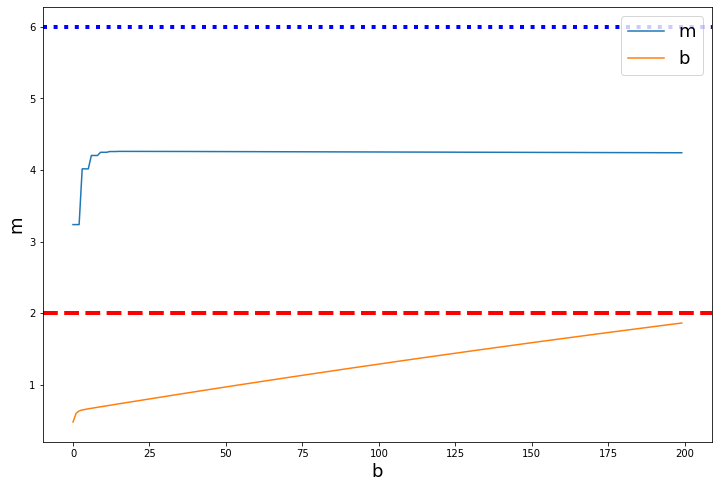

In [13]:

plt.figure(figsize=(12,8))
plt.plot(history_m[0:epochs])
plt.plot(history_b[0:epochs])

plt.axhline(y=2, xmin=0, xmax=epochs, c='r', linewidth=4,linestyle='--')
plt.axhline(y=6, xmin=0, xmax=epochs, c='b', linewidth=4, linestyle=':')
plt.ylabel('m',fontsize= 18)
plt.xlabel('b',fontsize= 18)
plt.legend(['m', 'b'], loc='upper right', fontsize= 18);

Aufgabe:
1. Ggeneriert mehr Daten(x)
2. Probiert Variationen von Loss
  - Exponent 4
  - Kein Mittelwert der Summe
  - Effekt zusammen